In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score

In [2]:
sal_train=pd.read_csv('Downloads\\SalaryData_Train(1).csv')
sal_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
sal_test=pd.read_csv('Downloads\\SalaryData_Test(1).csv')
sal_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [4]:
sal_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [5]:
sal_test.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [6]:
string_col=['workclass','education','maritalstatus','occupation','relationship','race','sex','native']

In [7]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
for i in string_col:
    sal_train[i]=label_encoder.fit_transform(sal_train[i])
    sal_test[i]=label_encoder.fit_transform(sal_test[i])

In [8]:
train_x=sal_train.iloc[0:500,0:13]
train_y=sal_train.iloc[0:500,13]

In [9]:
test_x=sal_test.iloc[0:300,0:13]
test_y=sal_test.iloc[0:300,13]

In [10]:
x_train1,x_test1,y_train1,y_test1=train_test_split(train_x,train_y,test_size=0.3)

In [11]:
x_train1.shape,x_test1.shape,y_train1.shape,y_test1.shape

((350, 13), (150, 13), (350,), (150,))

In [12]:
x_train2,x_test2,y_train2,y_test2=train_test_split(test_x,test_y,test_size=0.3)

In [13]:
x_train2.shape,x_test2.shape,y_train2.shape,y_test2.shape

((210, 13), (90, 13), (210,), (90,))

# For Train Data

In [14]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
clf=SVC()
param_grid=[{'kernel':['rbf'],'gamma':[100,50,10,5,1,0.1,0.01,0.001,0.0001],'C':[100,50,10,5,1,0.1,0.01,0.001,0.0001]}]
gsv=GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train1,y_train1)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [100, 50, 10, 5, 1, 0.1, 0.01, 0.001, 0.0001],
                          'gamma': [100, 50, 10, 5, 1, 0.1, 0.01, 0.001,
                                    0.0001],
                          'kernel': ['rbf']}])

In [16]:
gsv.best_params_,gsv.best_score_

({'C': 5, 'gamma': 0.001, 'kernel': 'rbf'}, 0.8085714285714285)

In [17]:
clf=SVC(C=50,gamma=0.001)
clf.fit(x_train1,y_train1)
y_pred1=clf.predict(x_test1)
acc=accuracy_score(y_test1,y_pred1)*100
print("Accuracy=",acc)
confusion_matrix(y_test1,y_pred1)

Accuracy= 83.33333333333334


array([[110,   6],
       [ 19,  15]], dtype=int64)

In [18]:
y_pred2=clf.predict(x_train1)
acc=accuracy_score(y_train1,y_pred2)*100
print("Accuracy=",acc)
confusion_matrix(y_train1,y_pred2)

Accuracy= 88.85714285714286


array([[268,   2],
       [ 37,  43]], dtype=int64)

# For Test Data

In [19]:
import warnings
warnings.filterwarnings("ignore")

In [20]:
clf=SVC()
param_grid=[{'kernel':['rbf'],'gamma':[100,50,10,5,1,0.1,0.01,0.001,0.0001],'C':[100,50,10,5,1,0.1,0.01,0.001,0.0001]}]
gsv=GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train2,y_train2)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [100, 50, 10, 5, 1, 0.1, 0.01, 0.001, 0.0001],
                          'gamma': [100, 50, 10, 5, 1, 0.1, 0.01, 0.001,
                                    0.0001],
                          'kernel': ['rbf']}])

In [21]:
gsv.best_params_,gsv.best_score_

({'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}, 0.8285714285714285)

In [22]:
clf=SVC(C=50,gamma=0.0001)
clf.fit(x_train2,y_train2)
y_pred3=clf.predict(x_test2)
acc=accuracy_score(y_test2,y_pred3)*100
print("Accuracy=",acc)
confusion_matrix(y_test2,y_pred3)

Accuracy= 78.88888888888889


array([[67,  0],
       [19,  4]], dtype=int64)

In [23]:
y_pred4=clf.predict(x_train2)
acc=accuracy_score(y_train2,y_pred4)*100
print("Accuracy=",acc)
confusion_matrix(y_train2,y_pred4)

Accuracy= 86.66666666666667


array([[161,   0],
       [ 28,  21]], dtype=int64)

In [38]:
import seaborn as sns  
import matplotlib.pyplot as plt  
%matplotlib inline  

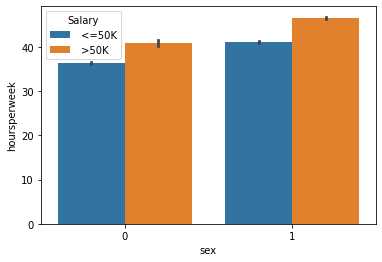

In [50]:
#'Male': 0, 'Female': 1
sns.barplot(sal_train.sex, sal_train['hoursperweek'], hue=sal_train['Salary'])
plt.show()

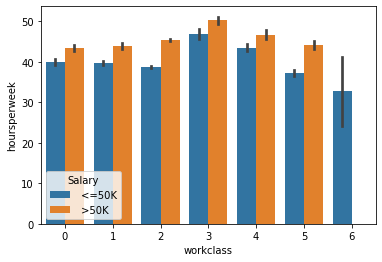

In [57]:
#Self-emp-inc': 0, 'State-gov': 1,'Federal-gov': 2, 'Without-pay': 3, 'Local-gov': 4,'Private': 5, 'Self-emp-not-inc': 6
sns.barplot(sal_train.workclass, sal_train['hoursperweek'], hue=sal_train['Salary'])
plt.show()

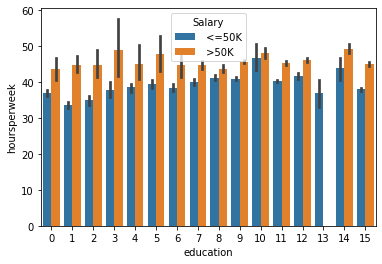

In [58]:
#Some-college': 0, 'Preschool': 1, '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, '12th': 5, '7th-8th': 6, 'Prof-school': 7,'1st-4th': 8, 'Assoc-acdm': 9, 'Doctorate': 10, '11th': 11,'Bachelors': 12, '10th': 13,'Assoc-voc': 14,'9th': 15
sns.barplot(sal_train.education, sal_train['hoursperweek'], hue=sal_train['Salary'])
plt.show()

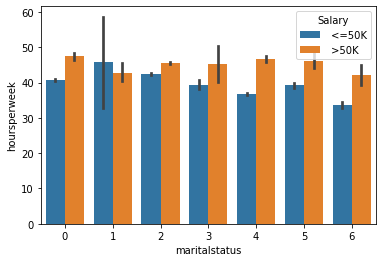

In [59]:
#Married-spouse-absent': 0, 'Widowed': 1, 'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4,'Never-married': 5, 'Married-AF-spouse': 6
sns.barplot(sal_train.maritalstatus, sal_train['hoursperweek'], hue=sal_train['Salary'])
plt.show()

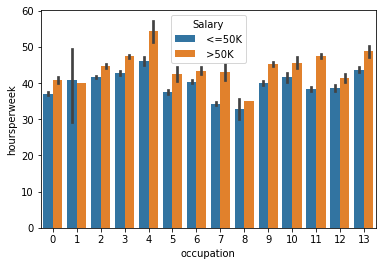

In [60]:
#'Farming-fishing': 1, 'Tech-support': 2, 'Adm-clerical': 3, 'Handlers-cleaners': 4, 'Prof-specialty': 5,'Machine-op-inspct': 6, 'Exec-managerial': 7,'Priv-house-serv': 8,'Craft-repair': 9,'Sales': 10, 'Transport-moving': 11, 'Armed-Forces': 12, 'Other-service': 13,'Protective-     serv':14
sns.barplot(sal_train.occupation, sal_train['hoursperweek'], hue=sal_train['Salary'])
plt.show()

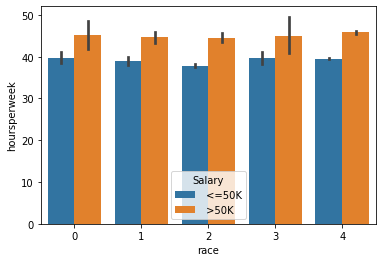

In [61]:
#Black': 0, 'Asian-Pac-Islander': 1,'Other': 2, 'White': 3, 'Amer-Indian-Eskimo': 4
sns.barplot(sal_train.race, sal_train['hoursperweek'], hue=sal_train['Salary'])
plt.show()

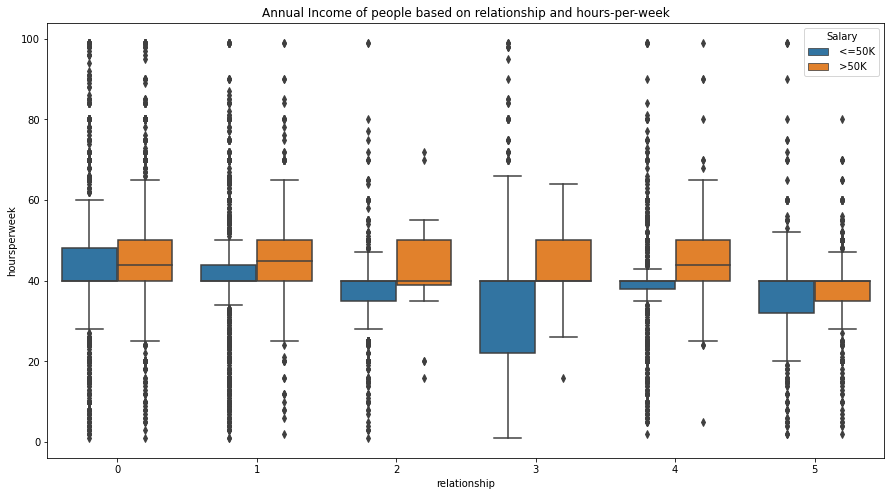

In [52]:
#Not-in-family': 0, 'Wife': 1, 'Other-relative': 2, 'Unmarried': 3,'Husband': 4,'Own-child': 5
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(x='relationship', y='hoursperweek', hue='Salary', data=sal_train, ax=ax)
ax.set_title('Annual Income of people based on relationship and hours-per-week')
plt.show()

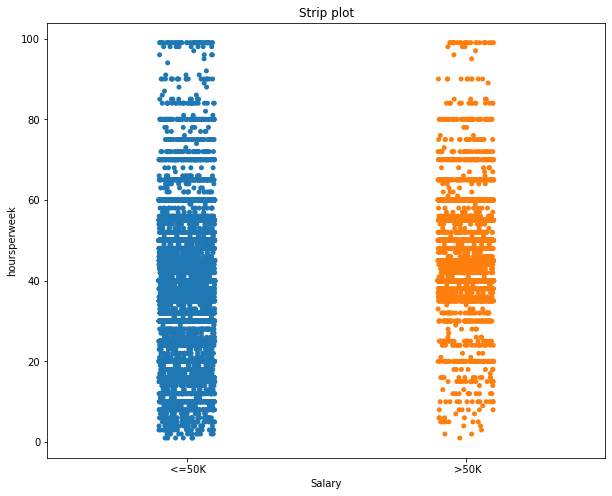

In [54]:
fig, ax= plt.subplots(figsize=(10, 8))
sns.stripplot(sal_train['Salary'],sal_train['hoursperweek'], jitter=True, ax=ax)
ax.set_title('Strip plot')
plt.show()

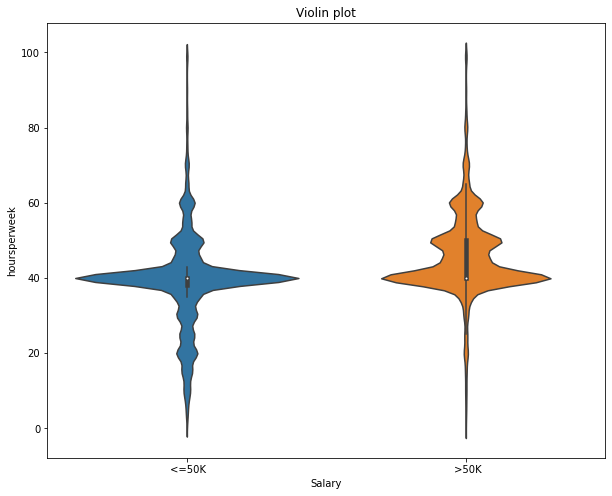

In [63]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.violinplot(x='Salary', y='hoursperweek', data=sal_train, ax=ax)
ax.set_title('Violin plot')
plt.show()

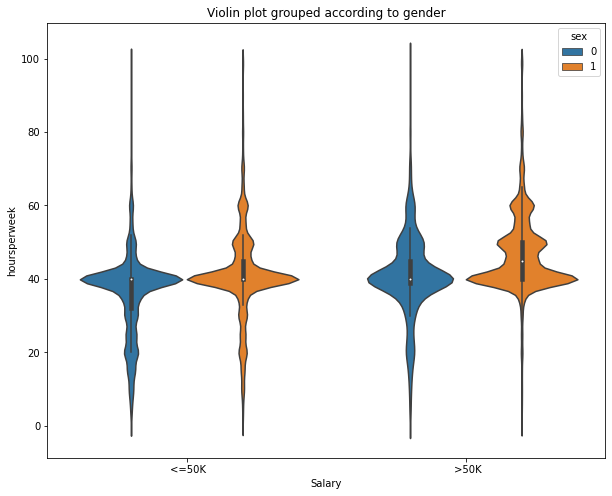

In [66]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.violinplot(x='Salary', y='hoursperweek', hue='sex', data=sal_train, ax=ax)
ax.set_title('Violin plot grouped according to gender')
plt.show()